In [2]:
%matplotlib inline

In [3]:
from glob import glob
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

In [4]:
path = '../data'
# fnames = sorted(glob(op.join(path, '*.nii*')))
fname = '../data/case_005_2.nii.gz'

def sitk_show(img, title=None, margin=0.05, dpi=40):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1] * spacing[1], nda.shape[0] * spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])
    plt.set_cmap("gray")
    ax.imshow(nda, extent=extent, interpolation=None)
    plt.title(title)
    
    plt.show()
    
white_matter = 1
gray_matter = 2

In [5]:
t1_img = sitk.ReadImage(fname)
arr = sitk.GetArrayFromImage(t1_img)

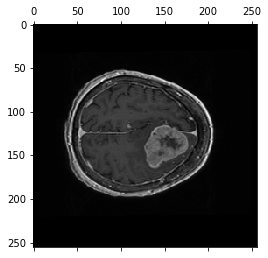

In [41]:
plt.matshow(arr[135, :, :].T)

In [45]:
t1_img_smooth = sitk.CurvatureFlow(t1_img, timeStep=0.05)